In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
file = pd.read_csv('heart2.csv')
print(file)
file.info()
file.describe()



     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
0     28    1   2      130  132   0       2     185     0      0.0           0
1     29    1   2      120  243   0       0     160     0      0.0           0
2     29    1   2      140    ?   0       0     170     0      0.0           0
3     30    0   1      170  237   0       1     170     0      0.0           0
4     31    0   2      100  219   0       1     150     0      0.0           0
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...         ...
289   52    1   4      160  331   0       0      94     1      2.5           1
290   54    0   3      130  294   0       1     100     1      0.0           1
291   56    1   4      155  342   1       0     150     1      3.0           1
292   58    0   2      180  393   0       0     110     1      1.0           1
293   65    1   4      130  275   0       1     115     1      1.0           1

[294 rows x 11 columns]
<class 'pandas.core.frame.D

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num       '],
      dtype='object')

In [61]:

file.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num       '],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [63]:
import numpy as np

# Replace '?' with NaN for easier handling
file.replace('?', np.nan, inplace=True)

# Now check for any NaN values
print(file.isnull().sum())  # This will show the count of missing values in each column

# Option 1: Drop rows with missing values
file.dropna(inplace=True)

# Option 2: Alternatively, you could fill missing values with mean/median/mode
# file.fillna(file.mean(), inplace=True)  # For numeric columns



age            0
sex            0
cp             0
trestbps       1
chol          23
fbs            8
restecg        1
thalach        1
exang          1
oldpeak        0
num            0
dtype: int64


In [64]:
print(file.dtypes)  # This will show the data types of all columns


age             int64
sex             int64
cp              int64
trestbps       object
chol           object
fbs            object
restecg        object
thalach        object
exang          object
oldpeak       float64
num             int64
dtype: object


In [11]:
# Convert categorical columns to numeric using one-hot encoding
import pandas as pd
import matplotlib.pyplot as plt
file = pd.read_csv('heart2.csv')
print(file)
file.info()
file.describe()


     age  sex  cp trestbps chol fbs restecg thalach exang  oldpeak  num       
0     28    1   2      130  132   0       2     185     0      0.0           0
1     29    1   2      120  243   0       0     160     0      0.0           0
2     29    1   2      140    ?   0       0     170     0      0.0           0
3     30    0   1      170  237   0       1     170     0      0.0           0
4     31    0   2      100  219   0       1     150     0      0.0           0
..   ...  ...  ..      ...  ...  ..     ...     ...   ...      ...         ...
289   52    1   4      160  331   0       0      94     1      2.5           1
290   54    0   3      130  294   0       1     100     1      0.0           1
291   56    1   4      155  342   1       0     150     1      3.0           1
292   58    0   2      180  393   0       0     110     1      1.0           1
293   65    1   4      130  275   0       1     115     1      1.0           1

[294 rows x 11 columns]
<class 'pandas.core.frame.D

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Replace '?' with NaN for easier handling
file.replace('?', np.nan, inplace=True)

# Now check for any NaN values
print(file.isnull().sum())  # This will show the count of missing values in each column

# Option 1: Drop rows with missing values
file.dropna(inplace=True)

# Option 2: Alternatively, you could fill missing values with mean/median/mode
# file.fillna(file.mean(), inplace=True)  # For numeric columns
file = pd.get_dummies(file, drop_first=True)

# Now proceed with the train-test split and logistic regression
X = file.drop('num       ', axis=1)
y = file['num       ']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)


age           0
sex           0
cp            0
oldpeak       0
num           0
             ..
thalach_94    0
thalach_96    0
thalach_98    0
thalach_99    0
exang_1       0
Length: 253, dtype: int64


In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test is your true labels and y_pred is your predicted labels
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Square Error (RMSE): {rmse}")


Root Mean Square Error (RMSE): 0.38851434494290565


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8490566037735849
Confusion Matrix:
[[28  5]
 [ 3 17]]


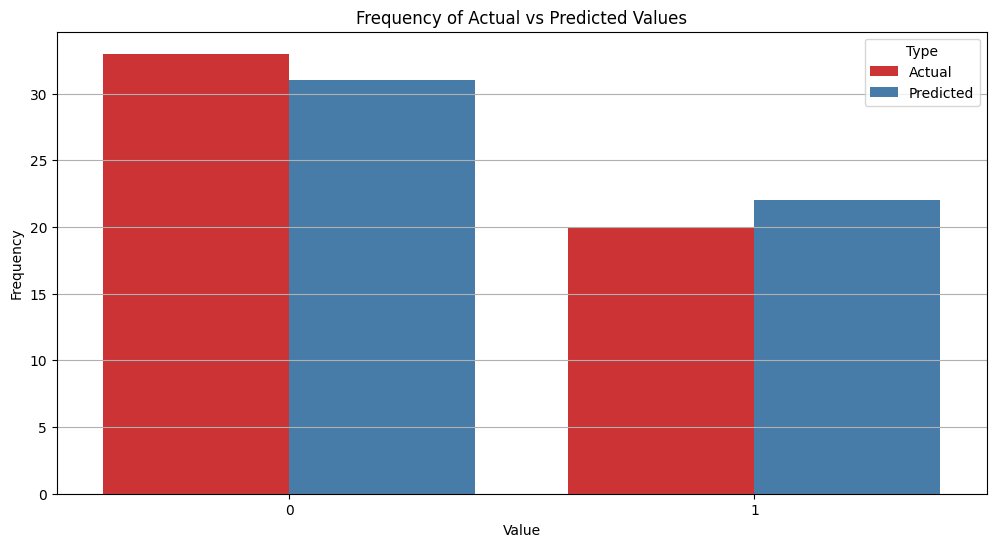

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for better plotting
import pandas as pd

# Assuming y_test and y_pred are already defined
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Melt the DataFrame to long format for easier plotting
results_long = pd.melt(results_df, value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Value')

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=results_long, x='Value', hue='Type', palette='Set1')

# Add titles and labels
plt.title('Frequency of Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['0', '1'])  # Adjust if you have more than 2 classes
plt.legend(title='Type', loc='upper right')
plt.grid(axis='y')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

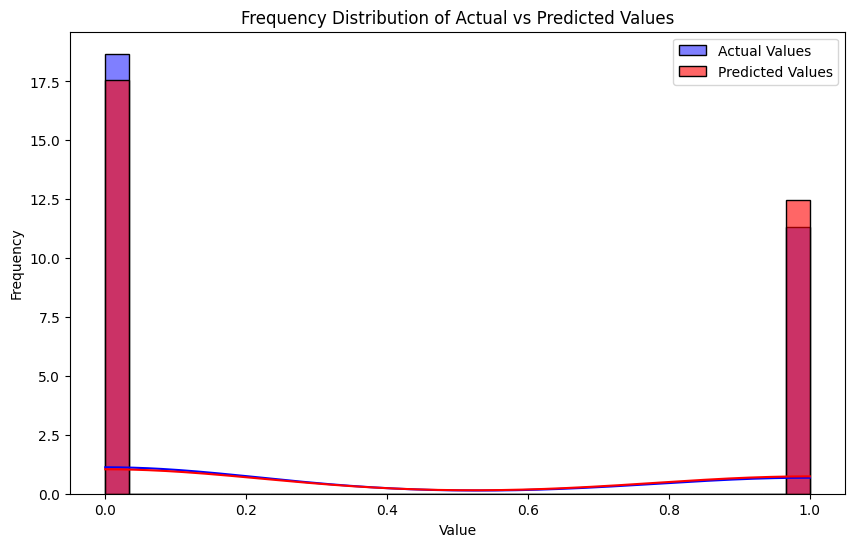

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are the actual and predicted values
# y_test = <actual values>
# y_pred = <predicted values>

plt.figure(figsize=(10, 6))

# Plot actual values distribution
sns.histplot(y_test, color='blue', label='Actual Values', kde=True, stat="density", bins=30)

# Plot predicted values distribution
sns.histplot(y_pred, color='red', label='Predicted Values', kde=True, stat="density", bins=30, alpha=0.6)

# Add labels and title
plt.title('Frequency Distribution of Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the legend
plt.legend()

# Display the plot
plt.show


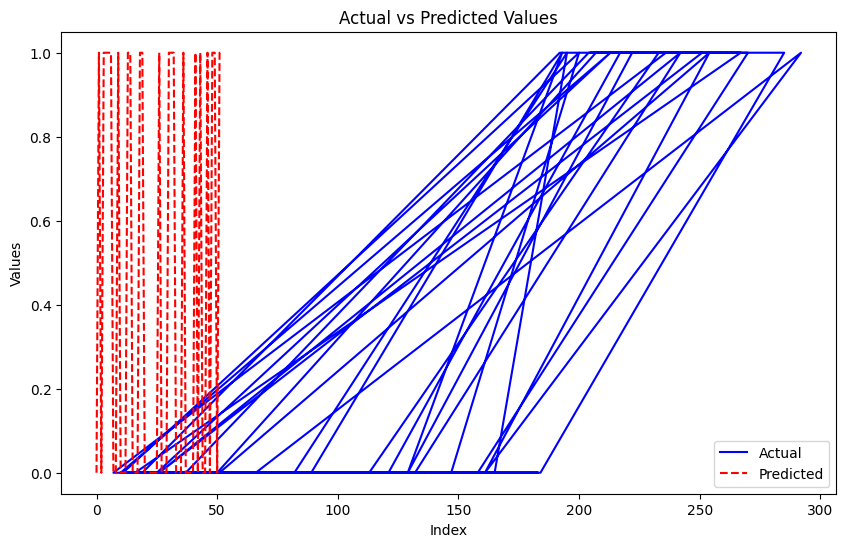

In [20]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(10,6))

# Plot actual values as a line
plt.plot(y_test, color='blue', label='Actual')

# Plot predicted values as a line
plt.plot(y_pred, color='red', label='Predicted', linestyle='dashed')

# Add labels, title, and legend
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()




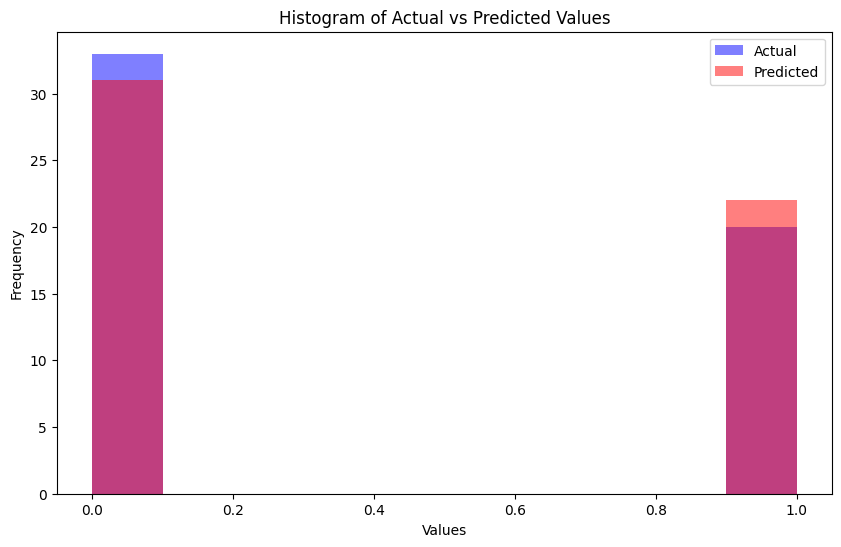

In [21]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(10,6))

# Plot histogram for actual values
plt.hist(y_test, bins=10, alpha=0.5, color='blue', label='Actual')

# Plot histogram for predicted values
plt.hist(y_pred, bins=10, alpha=0.5, color='red', label='Predicted')

# Add labels, title, and legend
plt.title('Histogram of Actual vs Predicted Values')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()


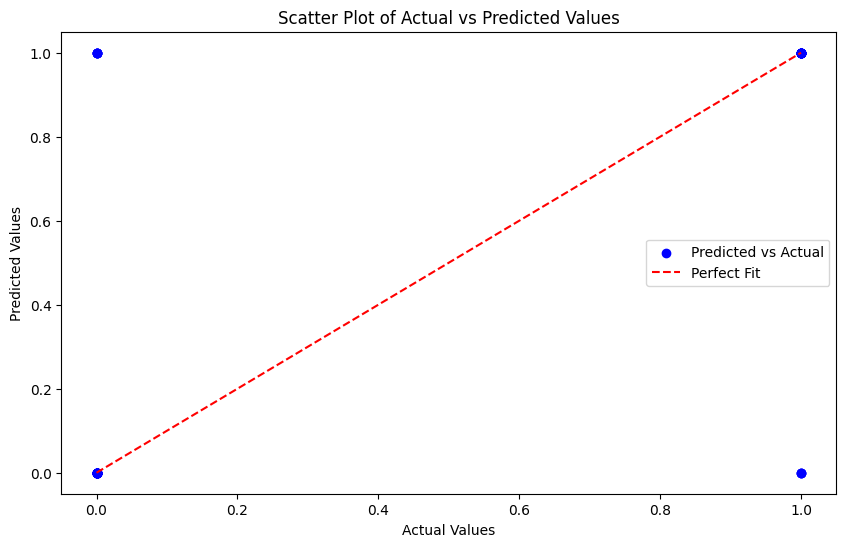

In [22]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your actual and predicted values
plt.figure(figsize=(10,6))

# Create scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Add a diagonal line to represent perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')

# Add labels, title, and legend
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()
